<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/logistic-regression/logistic_regression_heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import csv dataset**

In [1]:
!wget https://raw.githubusercontent.com/fgith/data-science/main/datasets/heart.csv

--2022-03-21 08:55:22--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  35.08K  --.-KB/s    in 0.003s  

2022-03-21 08:55:22 (13.7 MB/s) - ‘heart.csv’ saved [35921/35921]



**Import Libraries**

In [1]:
import pandas as pd

In [2]:
heartdisease = pd.read_csv("heart.csv")
heartdisease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Create X and Y **

In [3]:
Y = heartdisease["HeartDisease"]


In [5]:
X = heartdisease.drop("HeartDisease",axis=1)
X = X.drop("Sex",axis=1)
X = X.drop("ChestPainType",axis=1)
X = X.drop("RestingBP",axis=1)
X = X.drop("RestingECG",axis=1)
X = X.drop("ExerciseAngina",axis=1)
X = X.drop("ST_Slope",axis=1)
X

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,289,0,172,0.0
1,49,180,0,156,1.0
2,37,283,0,98,0.0
3,48,214,0,108,1.5
4,54,195,0,122,0.0
...,...,...,...,...,...
913,45,264,0,132,1.2
914,68,193,1,141,3.4
915,57,131,0,115,1.2
916,57,236,0,174,0.0


**Split Data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(734, 5) (184, 5)
(734,) (184,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score

**Fit Logistic Regression model to Training Data**

In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

**Predict test data using the model**

In [11]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1])

In [24]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of Determination: %.2f" % r2_score(Y_test,Y_pred))
print("Score: %.2f" % model.score(X_test,Y_test))

Coefficients:  [[ 0.00401151 -0.00450691  1.2428911  -0.02713948  1.01095231]]
Intercept:  [3.53111876]
Mean Squared Error: 0.23
Coefficient of Determination: 0.02
Score: 0.77


In [13]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


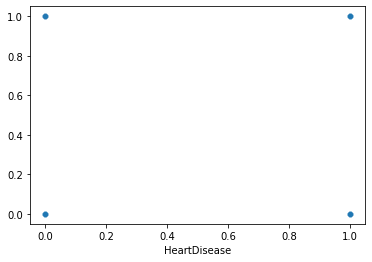

In [16]:
from matplotlib.pyplot import axis
sb.scatterplot(Y_test,Y_pred,alpha=0.2)
